In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de RO

In [2]:
gdf = gpd.read_file('Shapes/RO/11SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 14 columns):
ID            2443 non-null int64
CD_GEOCODI    2443 non-null object
TIPO          2443 non-null object
CD_GEOCODB    768 non-null object
NM_BAIRRO     768 non-null object
CD_GEOCODS    2443 non-null object
NM_SUBDIST    387 non-null object
CD_GEOCODD    2443 non-null object
NM_DISTRIT    2443 non-null object
CD_GEOCODM    2443 non-null object
NM_MUNICIP    2443 non-null object
NM_MICRO      2443 non-null object
NM_MESO       2443 non-null object
geometry      2443 non-null object
dtypes: int64(1), object(13)
memory usage: 267.3+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para RR

In [4]:
dados = pd.read_csv('Planilhas/RO/CSV/Basico_RO.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(2346, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,110001505000001,303.0,956.0,"3,16","1,91","1000,83","844813,39","1064,05","830862,08","637,19","621087,58","916,17","637455,02"
1,110001505000002,264.0,859.0,"3,25","2,39","925,75","755517,65","1044,44","728301,76","555,45","511544,75","885,82","523176,78"
2,110001505000003,201.0,661.0,"3,29","1,96","639,29","531392,81","755,86","540230,03","435,05","307764,68","639,91","321632,42"
3,110001505000004,84.0,266.0,"3,17","2,67","620,88","212843,17","724,36","172803,92","388,17","186830,91","655,57","139886,96"
4,110001505000005,356.0,1206.0,"3,39","3,11","425,03","192858,42","573,14","175107,71","283,56","131539,38","494,1","125166,63"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
ro = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
ro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 0 to 2345
Data columns (total 26 columns):
ID            2346 non-null int64
CD_GEOCODI    2346 non-null int64
TIPO          2346 non-null object
CD_GEOCODB    765 non-null object
NM_BAIRRO     765 non-null object
CD_GEOCODS    2346 non-null object
NM_SUBDIST    382 non-null object
CD_GEOCODD    2346 non-null object
NM_DISTRIT    2346 non-null object
CD_GEOCODM    2346 non-null object
NM_MUNICIP    2346 non-null object
NM_MICRO      2346 non-null object
NM_MESO       2346 non-null object
geometry      2346 non-null object
V001          2343 non-null float64
V002          2343 non-null float64
V003          2343 non-null object
V004          2343 non-null object
V005          2343 non-null object
V006          2343 non-null object
V007          2332 non-null object
V008          2332 non-null object
V009          2346 non-null object
V010          2346 non-null object
V011          2335 non-null object
V012         

In [10]:
del gdf
del dados

Text(0.5,1,'RONDONIA - RO')

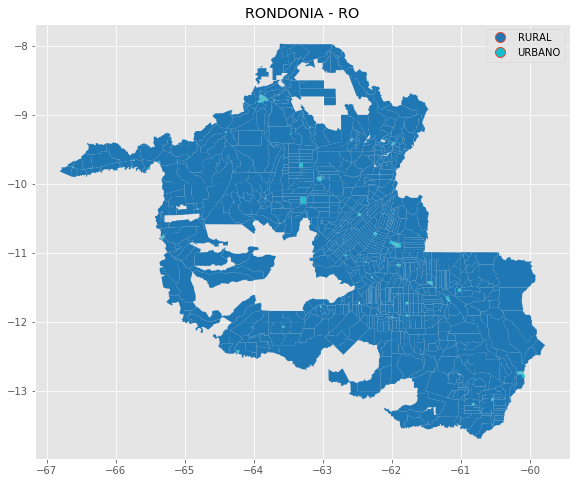

In [11]:
plt.style.use('ggplot')
ro.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('RONDONIA - RO')

# Utilizando a projeção de Albers para calcular as áreas

In [12]:
ro['AREA'] = ro.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [13]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [14]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [15]:
areas_urbanas_ro_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='RO']
del areas_urbanas_br_15

In [16]:
areas_urbanas_ro_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
122,SÃ£o Francisco do GuaporÃ©,RO,7.411,1101492.0,POLYGON ((-63.58758505775047 -12.0578209132792...,7.392443
267,Seringueiras,RO,3.500,1101500.0,"POLYGON ((-63.039546636712 -11.77749901620758,...",3.500305
565,TeixeirÃ³polis,RO,0.973,1101559.0,"POLYGON ((-62.258935651716 -10.93124966900111,...",0.972970
669,Theobroma,RO,1.605,1101609.0,POLYGON ((-62.35990720723392 -10.2448969592644...,1.604612
881,UrupÃ¡,RO,4.088,1101708.0,POLYGON ((-62.37162578617729 -11.1381326406637...,4.088166


In [17]:
areas_urbanas_ro_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_ro_15['CD_GEOCODM']=areas_urbanas_ro_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_ro_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 122 to 1242
Data columns (total 6 columns):
Municipio     52 non-null object
UF            52 non-null object
Area_Urb      52 non-null float64
CD_GEOCODM    52 non-null int64
geometry      52 non-null object
Area          52 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [18]:
ro.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

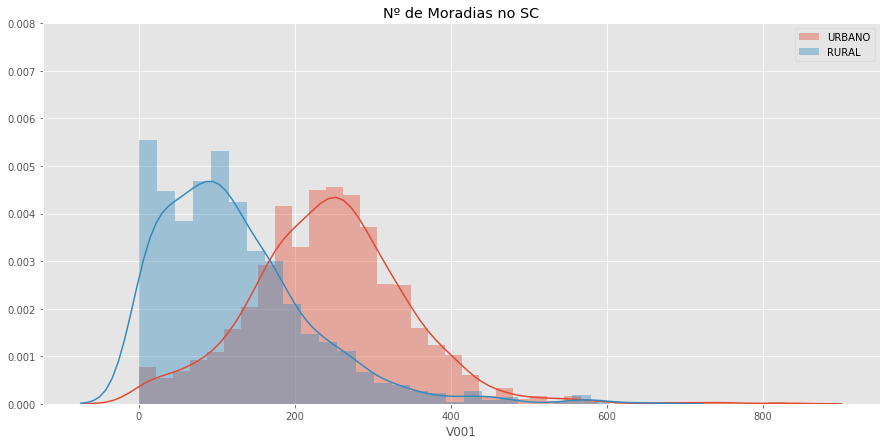

In [19]:
plt.style.use('ggplot')
ro['V001'] = pd.to_numeric(ro['V001'])
ro['V002'] = pd.to_numeric(ro['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(ro[ro['TIPO'] =='URBANO']['V001'])
sns.distplot(ro[ro['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [20]:
print('RURAL','\n',ro[ro['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',ro[ro['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    966.000000
mean     123.407867
std       98.077231
min        0.000000
25%       53.250000
50%      106.000000
75%      169.750000
max      649.000000
Name: V001, dtype: float64
URBANO 
 count    1380.000000
mean      243.758696
std       102.270308
min         1.000000
25%       180.000000
50%       244.500000
75%       302.000000
max       829.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.04)

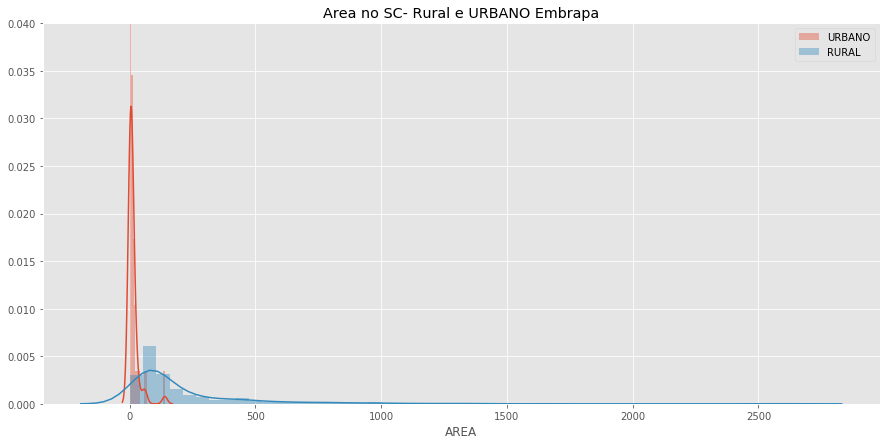

In [21]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_ro_15['Area'])
plt.legend(['URBANO'])
sns.distplot(ro[ro['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')
plt.ylim((0,0.04))

## Descrição da área por setor censitários urbanos e rurais

In [22]:
print('URBANO','\n',areas_urbanas_ro_15['Area'].describe())
print('RURAL','\n',ro[ro['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     52.000000
mean      12.057641
std       22.039601
min        0.644441
25%        1.586461
50%        5.224685
75%       12.019151
max      139.718056
Name: Area, dtype: float64
RURAL 
 count     966.000000
mean      202.781504
std       256.765852
min         0.213913
25%        63.892189
50%       111.539436
75%       232.051995
max      2635.895043
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

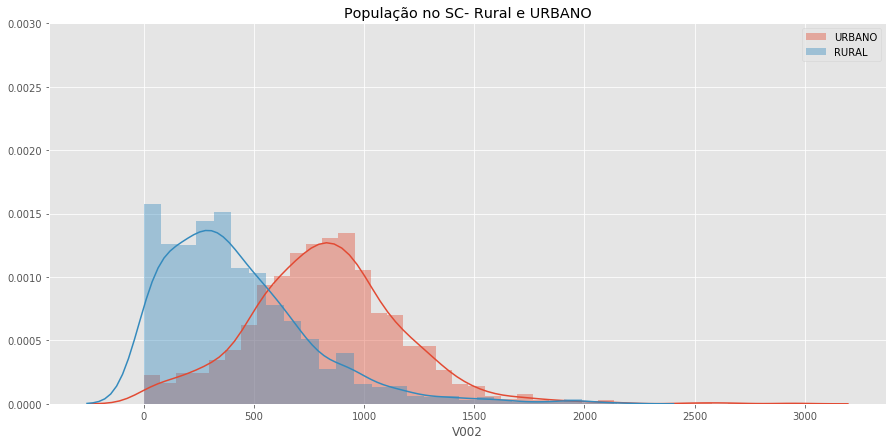

In [23]:
fig = plt.figure(figsize = (15,7))

sns.distplot(ro[ro['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(ro[ro['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [24]:
print('RURAL','\n',ro[ro['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',ro[ro['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     966.000000
mean      424.576605
std       338.168968
min         0.000000
25%       186.000000
50%       362.000000
75%       581.750000
max      2148.000000
Name: V002, dtype: float64
URBANO 
 count    1380.000000
mean      822.852174
std       353.228423
min         1.000000
25%       599.000000
50%       817.000000
75%      1015.250000
max      2946.000000
Name: V002, dtype: float64


In [25]:
ro['Densidade Moradias']= ro.V001/ro.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

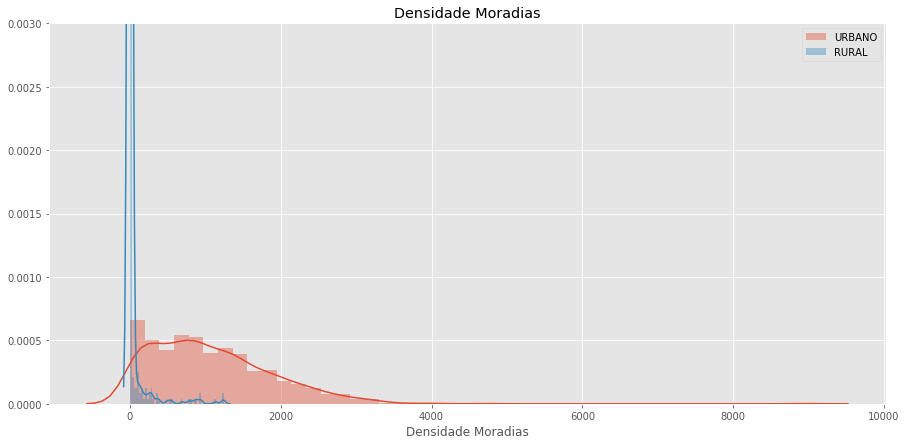

In [27]:
fig = plt.figure(figsize = (15,7))

sns.distplot(ro[ro['TIPO']=='URBANO']['Densidade Moradias'])
plt.legend(['URBANO'])
sns.distplot(ro[ro['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade Moradias')
plt.ylim((0,0.003))

In [30]:
print('RURAL','\n',ro[ro['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',ro[ro['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     966.000000
mean       18.897268
std       108.103496
min         0.000000
25%         0.303683
50%         0.998682
75%         1.869039
max      1245.927700
Name: Densidade Moradias, dtype: float64
URBANO 
 count    1380.000000
mean     1076.836044
std       804.978423
min         0.427994
25%       441.103603
50%       938.464598
75%      1535.145402
max      8952.913189
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [34]:
max_area = areas_urbanas_ro_15['Area'].mean() 
min_pop =  ro[ro['TIPO']=='URBANO']['V002'].mean()
min_mor =  ro[ro['TIPO']=='URBANO']['V001'].mean()
min_densi_mor = ro[ro['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [35]:
scrcu = ro[(ro.TIPO=='RURAL')&(ro.V001 >= min_mor)&(ro.AREA <= max_area)&(ro.V002>= min_pop)&(ro['Densidade Moradias']>= min_densi_mor)]

In [36]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000
mean,17937.666667,1.100227e+14,323.333333,1108.666667,0.268539,1206.304975
std,772.783497,1.951444e+10,36.828431,134.967897,0.033475,59.610482
min,17491.000000,1.100114e+14,284.000000,955.000000,0.229915,1137.750005
25%,17491.500000,1.100114e+14,306.500000,1059.000000,0.258224,1186.493613
50%,17492.000000,1.100114e+14,329.000000,1163.000000,0.286533,1235.237220
75%,18161.000000,1.100283e+14,343.000000,1185.500000,0.287850,1240.582460
max,18830.000000,1.100452e+14,357.000000,1208.000000,0.289167,1245.927700


Text(0.5,1,'SCRCU - Por Município')

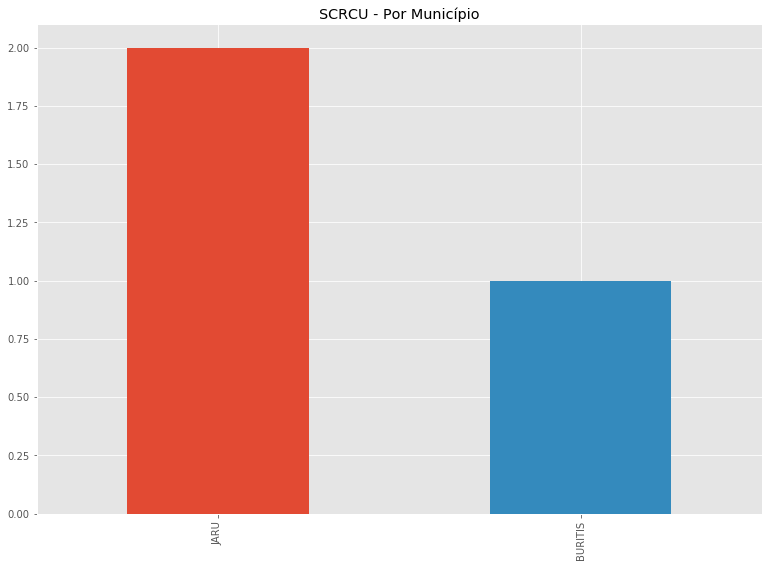

In [37]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de RO - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


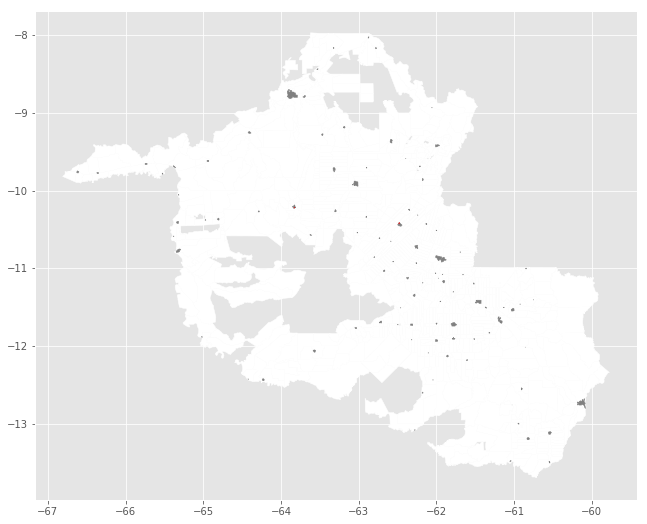

In [38]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
ro.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_ro_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [39]:
areas_urbanas_ro_15.rename(columns={'Area':'AREA'},inplace = True)

In [40]:
fonte = np.zeros(areas_urbanas_ro_15.shape[0])
areas_urbanas_ro_15['FONTE'] = fonte

In [41]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
regioes_urbanas_ro = scrcu[['geometry','FONTE']].append(areas_urbanas_ro_15[['geometry','FONTE']])

In [43]:
regioes_urbanas_ro.head()

,geometry,FONTE
596,"POLYGON ((-62.4817978588877 -10.4177322064942,...",1.0
597,"POLYGON ((-62.4817978588877 -10.4177322064942,...",1.0
1936,POLYGON ((-63.83178031896637 -10.2250223011187...,1.0
122,POLYGON ((-63.58758505775047 -12.0578209132792...,0.0
267,"POLYGON ((-63.039546636712 -11.77749901620758,...",0.0


In [44]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_ro['FONTE'] = regioes_urbanas_ro['FONTE'].apply(fonte) 

In [45]:
regioes_urbanas_ro.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_ro.shp')

In [48]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_ro[regioes_urbanas_ro['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_ro[regioes_urbanas_ro['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_ro.crs)

In [49]:
mplleaflet.show(fig=f,crs=regioes_urbanas_ro.crs)